## Importing Dataset

In [1]:
# collecting data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Data Preprocessing

Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    batch_size = 32,
    image_size = (64, 64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


# Validatiion Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    batch_size = 32,
    image_size = (64, 64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


## Building Model

In [5]:
cnn = tf.keras.models.Sequential()

# Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Dropout(0.5))   # To avoid overfitting

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units = 36, activation= 'softmax'))

## Compiling and Training Phase

In [10]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 36)             │     2,214,180 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,215,972 (8.45 MB)

 Trainable params: 2,215,972 (8.45 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
training_history = cnn.fit(x = training_set, validation_data = validation_set, epochs = 32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 612s 6s/step - accuracy: 0.0498 - loss: 404.7764 - val_accuracy: 0.5328 - val_loss: 2.1326
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 551ms/step - accuracy: 0.4647 - loss: 2.1258 - val_accuracy: 0.7350 - val_loss: 1.6160
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 539ms/step - accuracy: 0.6460 - loss: 1.3511 - val_accuracy: 0.8006 - val_loss: 1.5611
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 53s 536ms/step - accuracy: 0.7337 - loss: 1.0659 - val_accuracy: 0.8120 - val_loss: 1.6175
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 582ms/step - accuracy: 0.7968 - loss: 0.8848 - val_accuracy: 0.8405 - val_loss: 1.4856
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 53s 538ms/step - accuracy: 0.8174 - loss: 0.8254 - val_accuracy: 0.8490 - val_loss: 1.5707
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 53s 536ms/step - accuracy: 0.8392 - loss: 0.7597 - val_accuracy: 0.8632 - val_loss: 1.3074
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 89s 613ms/step - accuracy: 0.8636 - loss: 0.6151 - val_accu

## Saving The Model

In [13]:
cnn.save('trained_model.h5')

In [15]:
training_history.history

{'accuracy': [0.06613162159919739,
  0.4760834574699402,
  0.6600320935249329,
  0.7489566802978516,
  0.7948635816574097,
  0.8243981003761292,
  0.8426966071128845,
  0.8645265102386475,
  0.8609951734542847,
  0.8757624626159668,
  0.8869984149932861,
  0.8773675560951233,
  0.8947030305862427,
  0.8847512006759644,
  0.8966292142868042,
  0.9052969217300415,
  0.9078651666641235,
  0.902407705783844,
  0.9104334115982056,
  0.9094703197479248,
  0.9200642108917236,
  0.9226323962211609,
  0.9232744574546814,
  0.9191011190414429,
  0.9133226275444031,
  0.9226323962211609,
  0.9280899167060852,
  0.9367576241493225,
  0.9316211938858032,
  0.9345104098320007,
  0.9332263469696045,
  0.9383627772331238],
 'loss': [152.95436096191406,
  2.070169448852539,
  1.389351725578308,
  1.099218726158142,
  0.9608929753303528,
  0.8381032347679138,
  0.8300519585609436,
  0.6753776669502258,
  0.728122889995575,
  0.6941733956336975,
  0.700386106967926,
  0.7519404888153076,
  0.686493337154

In [17]:
# Recording History
import json
with open ('training_history.json', 'w') as f:
  json.dump(training_history.history, f)

In [19]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Calculating Accuracy of Model Acheived on Validation Set

In [20]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 92.30769276618958 %


# Accuracy Visualization

## Training Visualization

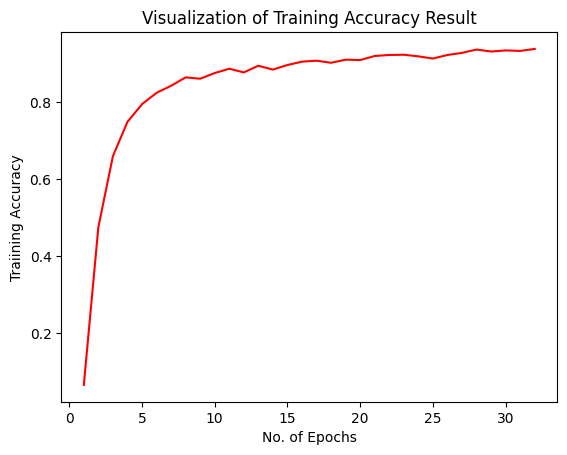

In [21]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

# Validation Accuracy

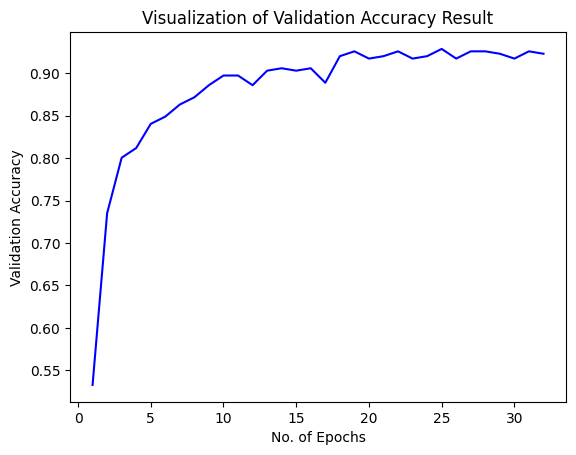

In [22]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

# Test set Evaluation

In [24]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [25]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.9260 - loss: 1.8905
Test accuracy: 0.9220055937767029


# Testing the model

## Load the model

In [26]:
cnn_model = tf.keras.models.load_model('/content/trained_model.h5')

# Visualising and Performing Prediction on Single image

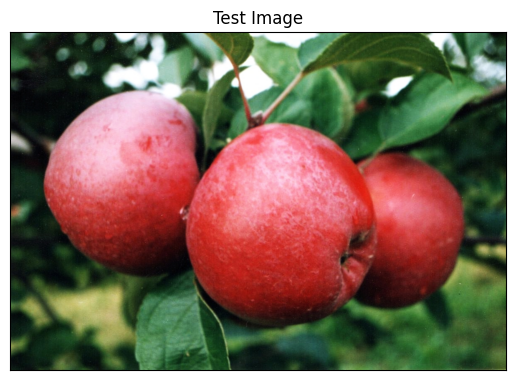

In [28]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/Fruit/test/apple/Image_8.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Testing Model

In [29]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn_model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [30]:
print(predictions)

[[1.0000000e+00 0.0000000e+00 1.8846464e-36 5.0041721e-29 4.8450493e-37
  0.0000000e+00 2.0928469e-30 0.0000000e+00 4.9615243e-34 6.4444298e-38
  0.0000000e+00 4.1547355e-28 1.5162064e-20 0.0000000e+00 6.3087846e-35
  6.9789735e-37 0.0000000e+00 4.6686902e-37 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0849954e-33 0.0000000e+00 5.9545325e-38 1.3730927e-31
  8.3878781e-33 2.0600431e-26 1.2807507e-33 9.2580891e-31 0.0000000e+00
  0.0000000e+00 1.8252707e-34 0.0000000e+00 4.0141123e-30 2.6174016e-28
  0.0000000e+00]]


In [31]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [32]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


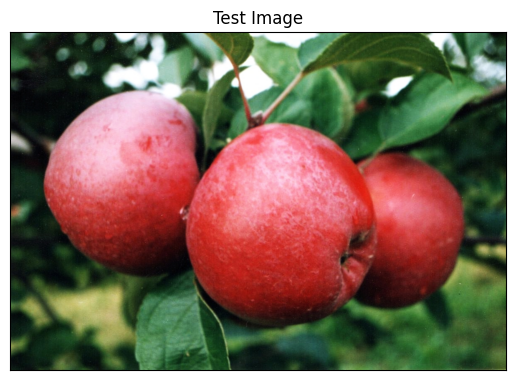

In [33]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [34]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a apple
